In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ram.analysis.run_manager import RunManagerGCP
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

### List all Strategies available in Storage

In [3]:
RunManagerGCP.get_strategies()

[u'LongPeadStrategy']

### List all Runs for specific Strategy in Storage

In [4]:
RunManagerGCP.get_run_names('LongPeadStrategy')

,Run,RunDate,Completed,Description
0,run_0006,2017-08-05,True,Version 57
1,run_0007,2017-08-05,True,Version 59
2,run_0013,2017-08-05,True,Version 65
3,run_0005,2017-08-05,True,Version 56
4,run_0008,2017-08-05,True,Version 60
5,run_0009,2017-08-05,True,Version 61
6,run_0012,2017-08-04,True,Version 64
7,run_0011,2017-08-05,True,Version 63
8,run_0010,2017-08-05,True,Version 62


## Analysis of a Single Run

In [5]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0010', test_periods=6, start_year=2004)

### Parameters

In [6]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,logistic_spread,0.01,36,0.490801,0.038609,-999.0
1,logistic_spread,0.1,36,0.490709,0.038605,-999.0
2,logistic_spread,0.5,36,0.488391,0.038511,-999.0
3,logistic_spread,1,36,0.481596,0.038231,-999.0
4,max_features,0.8,48,0.561804,0.044595,-999.0
5,max_features,log2,48,0.420192,0.033032,-999.0
6,max_features,sqrt,48,0.481627,0.037840,-999.0
7,min_samples_leaf,140,72,0.493726,0.039227,-999.0
8,min_samples_leaf,300,72,0.482022,0.037751,-999.0
9,n_estimators,160,72,0.500141,0.039246,-999.0


### Plot results

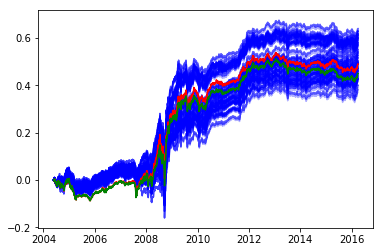

In [7]:
run1.plot_results()

### Returns Analysis

Note, this uses a basic model selection technique on the back end

In [8]:
stats, returns = run1.analyze_returns()

In [9]:
stats

,ReturnOptim,SharpeOptim
Total,0.4896,0.4502
Mean,0.0002,0.0002
Std,0.0039,0.0039
Skew,-0.6111,-0.5032
Kurt,31.6200,30.5000
Sharpe,0.6631,0.6190
Sortino,1.0492,0.9799
MinRet,-0.0601,-0.0579
WinP,0.5260,0.5190
DD%,-0.1868,-0.1727


In [10]:
returns

qtr,1,2,3,4
year,,,,
2004,NaN,-0.009792,-0.015958,0.029188
2005,-0.076735,0.002848,-0.005328,0.018115
2006,0.011566,0.007966,0.018964,0.012800
2007,-0.004484,0.005378,-0.002613,0.032005
2008,-0.004195,0.132438,-0.045087,0.166007
2009,0.076539,0.013115,-0.016966,0.022533
2010,-0.024400,0.046183,0.030452,-0.015350
2011,0.004776,0.008803,0.046183,0.034427
2012,0.012060,-0.000683,0.018813,-0.004346


## Combinations

In [11]:
RunManagerGCP.get_run_names('LongPeadStrategy')

,Run,RunDate,Completed,Description
0,run_0006,2017-08-05,True,Version 57
1,run_0007,2017-08-05,True,Version 59
2,run_0013,2017-08-05,True,Version 65
3,run_0005,2017-08-05,True,Version 56
4,run_0008,2017-08-05,True,Version 60
5,run_0009,2017-08-05,True,Version 61
6,run_0012,2017-08-04,True,Version 64
7,run_0011,2017-08-05,True,Version 63
8,run_0010,2017-08-05,True,Version 62


In [12]:
# These runs are not correctly labelled
runs = {
    'run_0006': 'Sector50',
    'run_0007': 'Sector45',
    'run_0008': 'Sector30',
    'run_0009': 'Sector10',
    'run_0010': 'Sector35',
    'run_0011': 'Sector40',
    'run_0012': 'Sector25',
    'run_0013': 'Sector15'
}

comb = CombinationSearch()

for run, sector in runs.iteritems():
    comb.add_run(RunManagerGCP('LongPeadStrategy', run, start_year=2004,
                               test_periods=6))

comb.start(20, criteria='sharpe')

  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python2.7/dist-packages/ram/analysis/combo_search.py:69: RuntimeWarning: divide by zero encountered in divide
  return np.mean(ports, axis=1) / np.std(ports, axis=1)
100%|██████████| 20/20 [05:04<00:00, 15.39s/it]


In [13]:
get_stats(comb.best_results_rets)

AssertionError: 

In [14]:
rollup_returns(comb.best_results_rets, 0).sum(axis=1)

Year
2004         NaN
2005    0.088792
2006    0.103179
2007    0.066998
2008    0.125690
2009    0.067726
2010    0.033047
2011    0.046198
2012    0.040165
2013    0.040385
2014   -0.016393
2015    0.040858
2016    0.010809
dtype: float64

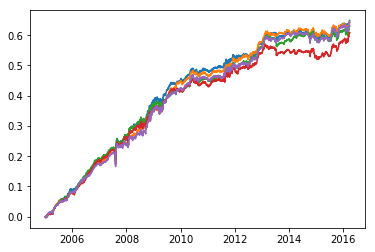

In [15]:
plt.figure()
plt.plot(comb.best_results_rets.cumsum())
plt.show()